<h1>Esercitazione Anagrafica</h1><h2>Dati e Frequenze</h2><h3>Anagrafica</h3>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

players = pd.read_csv(r'/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/Anagrafica.csv', sep=" ", index_col=0);
players

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore1,47,76,170,2
Giocatore2,81,75,170,2
Giocatore3,75,70,168,1
Giocatore4,75,72,178,2
Giocatore5,49,130,182,2
...,...,...,...,...
Giocatore430,48,95,180,2
Giocatore431,39,101,186,2
Giocatore432,54,72,180,2


In [161]:
age = players["ETA"].value_counts()
age

70    16
64    16
71    15
72    15
60    14
      ..
92     1
32     1
94     1
93     1
35     1
Name: ETA, Length: 62, dtype: int64

Calcolo le frequenze assolute dell'età

In [162]:
players_abs_age = pd.crosstab(index=players["ETA"], columns=["Abs. Freq"], colnames=[""])
players_abs_age.head(15)

,Abs. Freq
ETA,
32,1
34,1
35,1
36,2
39,3
40,1
41,2
42,1
43,3


Calcolo le frequenze relative dell'età

In [163]:
players_rel_freq = pd.crosstab(index=players['ETA'], columns=["Rel Freq"], colnames=[""], normalize=True)
players_rel_freq

,Rel Freq
ETA,
32,0.002304
34,0.002304
35,0.002304
36,0.004608
39,0.006912
...,...
92,0.002304
93,0.002304
94,0.002304


In [164]:
players_rel_freq.apply(lambda x: np.round(x*100, 2)).astype(str).apply(lambda p: p+'%')

,Rel Freq
ETA,
32,0.23%
34,0.23%
35,0.23%
36,0.46%
39,0.69%
...,...
92,0.23%
93,0.23%
94,0.23%


In [165]:
players_rel_freq_percent = players_rel_freq.copy()
players_rel_freq_percent['Rel Freq'] = players_rel_freq_percent['Rel Freq'].apply(lambda x : "{}{}".format(np.round(x*100, 2), "%"))
players_rel_freq_percent

,Rel Freq
ETA,
32,0.23%
34,0.23%
35,0.23%
36,0.46%
39,0.69%
...,...
92,0.23%
93,0.23%
94,0.23%


In [166]:
players_abs_age[players_abs_age["Abs. Freq"] > 15]

,Abs. Freq
ETA,
64,16
70,16


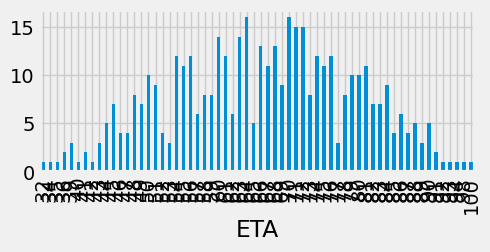

In [167]:
players_abs_age.plot.bar(legend=False)
plt.show()

In [168]:
players_rel_freq['Rel Freq'] = players_rel_freq['Rel Freq'].apply(lambda x: round(x*100, 2))

<h3>Heroes</h3>
<ul>
Domande:   
<li>Funzione lamba agginta '%': necessaria la creazione di un nuovo dataframe?</li>
<li>Dati con caratteri diversi: Brown != brown -> come mi comporto? to_upper() ha senso?</li>
<li>Colori occhi maschi e femmine. Errore nella sovrapposizione delle barre dovuto a che cosa?</li>
</ul>

Lavoro sul colore degli occhi

In [192]:
heroes = pd.read_csv(r'/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/heroes.csv', sep=";", index_col=0)
#heroes["Eye color"] = heroes["Eye color"].apply(lambda x: str(x).upper())
heroes

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Abraxas,Abraxas,Within Eternity,Marvel Comics,NaN,NaN,M,NaN,Blue,Black,100.0,high
Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Marvel Comics,203.04,441.98,M,NaN,Green,No Hair,80.0,good
Adam Monroe,NaN,NaN,NBC - Heroes,NaN,NaN,M,NaN,Blue,Blond,10.0,good
Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Alan Scott,Alan Ladd Wellington Scott,Gotham City,DC Comics,180.98,90.81,M,1940.0,Blue,Blond,80.0,good
Amazo,NaN,NaN,DC Comics,257.49,173.95,M,1960.0,Red,NaN,100.0,good
Ant-Man,Hank Pym,"Elmsford, New York",Marvel Comics,211.74,122.44,M,1962.0,Blue,Blond,20.0,high


In [193]:
eye_color_rel = pd.crosstab(index = heroes["Eye color"], columns=["Rel Freq"], colnames=[""], normalize=True)

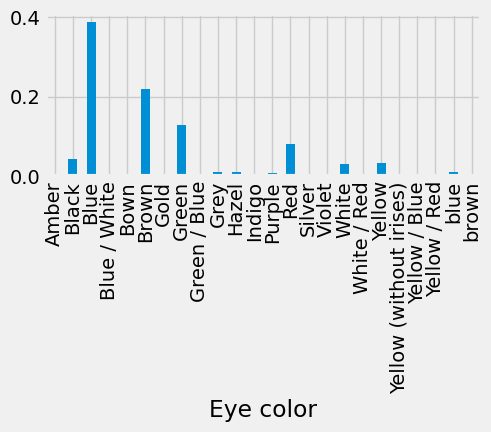

In [194]:
eye_color_rel.plot.bar(legend=False)
plt.show()

In [195]:
male_eyes_color = pd.crosstab(index = heroes.loc[heroes["Gender"] == 'M', "Eye color"], columns=["Freq abs"], colnames=[''])
female_eyes_color = pd.crosstab(index = heroes.loc[heroes["Gender"] == 'M', "Eye color"], columns=["Freq abs"], colnames=[''])
male_eyes_color

,Freq abs
Eye color,
Amber,1
Black,18
Blue,139
Blue / White,1
Bown,1
Brown,105
Gold,3
Green,30
Green / Blue,1


<hr>

In [196]:
male_eyes_color_rel = pd.crosstab(index = heroes.loc[heroes["Gender"] == 'M', "Eye color"], columns=["Fr Rel"], normalize=True, colnames=['']).loc[:, "Fr Rel"]
female_eyes_color_rel = pd.crosstab(index = heroes.loc[heroes["Gender"] == 'F', "Eye color"], columns=["Fr Rel"], normalize=True, colnames=['']).loc[:, "Fr Rel"]
#male_eyes_color_rel = male_eyes_color_rel.reindex(heroes['Eye color'].unique())
#female_eyes_color_rel = female_eyes_color_rel.reindex(heroes['Eye color'].unique())
#male_eyes_color_rel = male_eyes_color_rel.apply(lambda x: x*100)
#female_eyes_color_rel = female_eyes_color_rel.apply(lambda x: x*100)
male_eyes_color_rel

Eye color
Amber           0.002597
Black           0.046753
Blue            0.361039
Blue / White    0.002597
Bown            0.002597
Brown           0.272727
Gold            0.007792
Green           0.077922
Green / Blue    0.002597
Grey            0.015584
Hazel           0.007792
Purple          0.005195
Red             0.096104
Silver          0.002597
White           0.033766
White / Red     0.002597
Yellow          0.041558
Yellow / Red    0.002597
blue            0.010390
brown           0.005195
Name: Fr Rel, dtype: float64

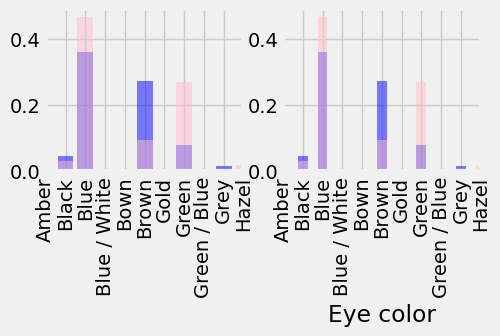

In [217]:
plt.subplot(1,2,1)
plt.bar(male_eyes_color_rel.index, male_eyes_color_rel.values, color="blue", alpha=0.5)
plt.bar(female_eyes_color_rel.index, female_eyes_color_rel.values, color="pink", alpha=0.5)
plt.xticks(rotation=90)
plt.xlim(0, 10)

plt.subplot(1,2,2)
male_eyes_color_rel2 = male_eyes_color_rel.reindex(heroes["Eye color"].unique()).sort_index().plot.bar(color="blue", alpha=0.5)
female_eyes_color_rel2 = female_eyes_color_rel.reindex(heroes["Eye color"].unique()).sort_index().plot.bar(color="pink", alpha=0.5)
plt.xlim(0, 10)
plt.show()

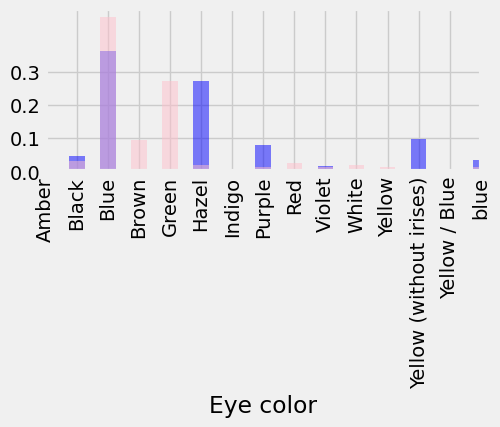

In [216]:
male_eyes_color_rel.plot.bar(color="blue", alpha=0.5)
female_eyes_color_rel.plot.bar(color="pink",alpha=0.5)
plt.yticks(np.arange(0, 0.4, 0.1))
plt.xlim(0, 14)
plt.show()

Prime Apparizioni

In [ ]:
heroes = pd.read_csv(r'/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/heroes.csv', sep=";", index_col=0)
heroes = heroes[heroes['First appearance']< 2020]
first_app = heroes['First appearance'].value_counts()

<h5>Diagramma a barre</h5>

Problema: Frequenze non fanno riferimento a un anno, bensì a un in intervallo temporale centrato in un anno

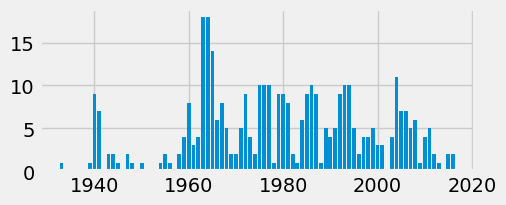

In [ ]:
plt.bar(first_app.index, first_app.values)
plt.show()

<h5>Diagramma Bastonicini</h5>

Ora ogni anno è evidenziato da un segmento verticale piuttosto che da una barra. in cima inserisco dei pallini

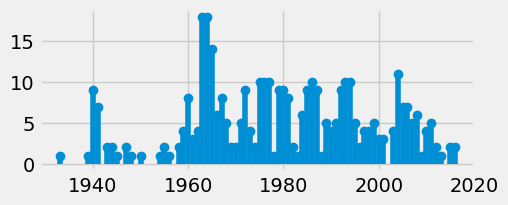

In [ ]:
plt.vlines(first_app.index, 0, first_app.values)
plt.plot(first_app.index, first_app.values, 'o')
plt.show()

<h5>Istogramma</h5>

Prendo come riferimento il peso e faccio il diagramma a fiammiferi.

Problema: Il peso è un dato quantitativo per cui non ha di norma senso considerare un singolo valore per ciò non vedo delle barre separate.

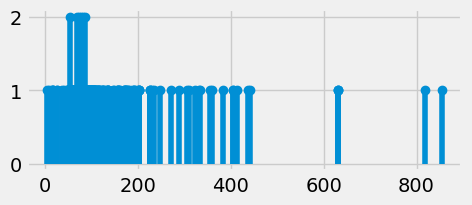

In [ ]:
w = heroes['Weight'].value_counts()
plt.vlines(w.index, 0, w.values)
plt.plot(w.index, w.values, 'o')
plt.show()


Quindi risulta **più sensato calcolare le frequenze di _intervalli_ di possibili valori osservabili.**

`Bins` mi sceglie l'intervallo di riferimento

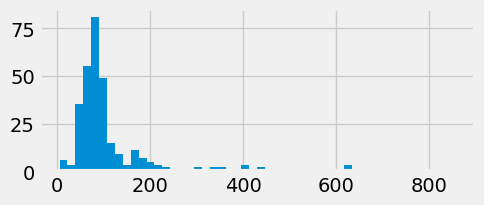

In [ ]:
heroes['Weight'].hist(bins=50)
plt.show()

Decido di dare diversi valori a diversi intervalli

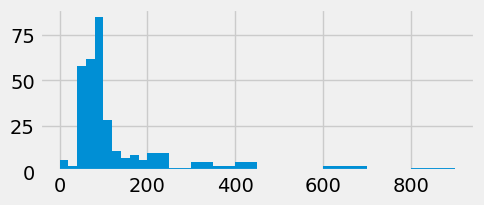

In [ ]:
heroes['Weight'].hist(bins=np.hstack((np.arange(0, 200, 20),
                                      np.arange(200, 500, 50),
                                      np.arange(500, 1000, 100))))
plt.show()

<h5>Frequenze Comulate</h5>

In [ ]:
first_app_cumsum = pd.crosstab(index=heroes['First appearance'], columns=['freq comulate'], colnames=[''], normalize=True).cumsum()
first_app_cumsum

,freq comulate
First appearance,
1933.0,0.002732
1939.0,0.005464
1940.0,0.030055
1941.0,0.049180
1943.0,0.054645
...,...
2011.0,0.980874
2012.0,0.986339
2013.0,0.989071


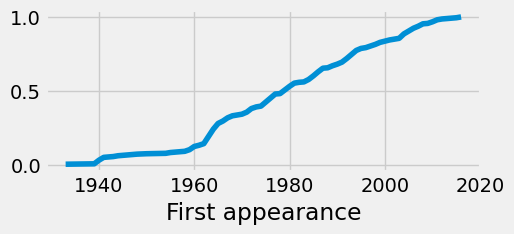

In [ ]:
first_app_cumsum.plot(legend=False)
plt.show()

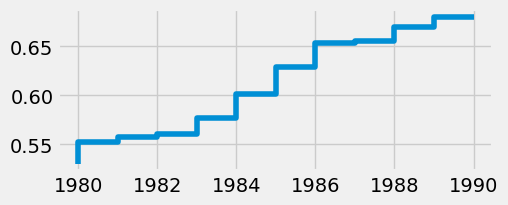

In [ ]:
import statsmodels.api as st

ecdf = st.distributions.ECDF(heroes['First appearance'])
x = np.arange(1980, 1991)
y = ecdf(x)
plt.step(x, y)
plt.show()


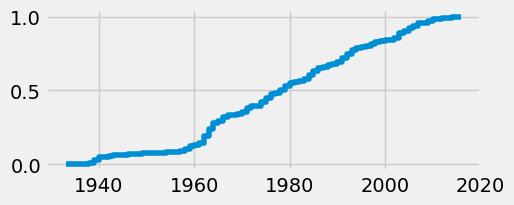

In [ ]:
min_year = min(heroes['First appearance'])
max_year = max(heroes['First appearance'])
x = np.arange(min_year, max_year + 1)
y = ecdf(x)
plt.step(x,y)
plt.show()